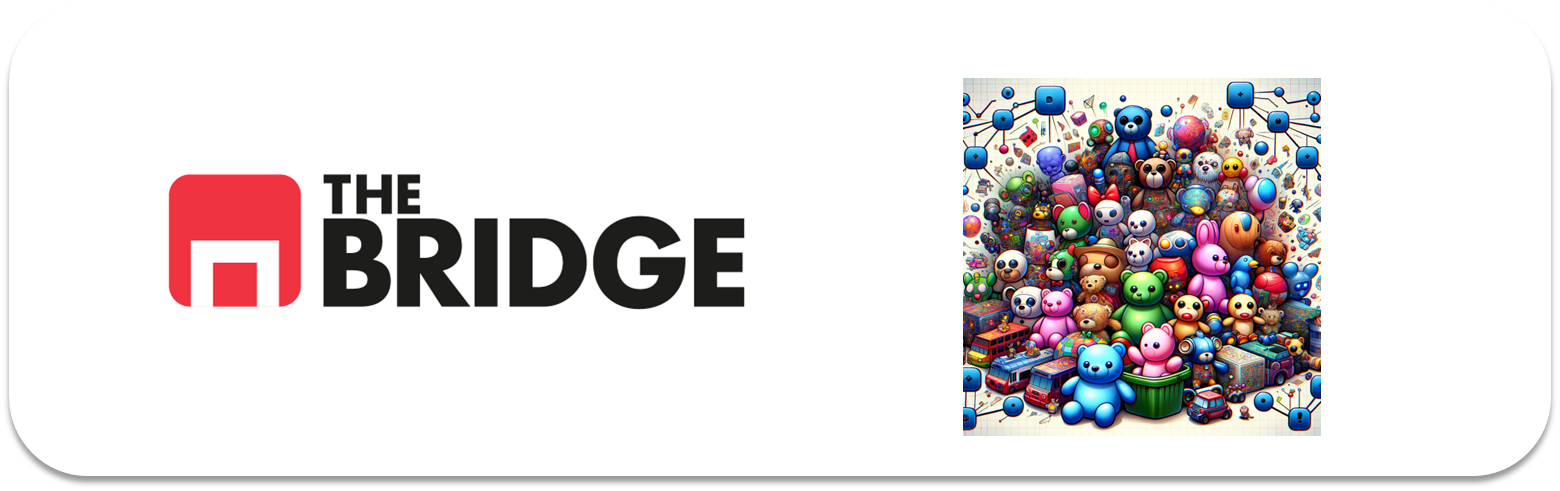

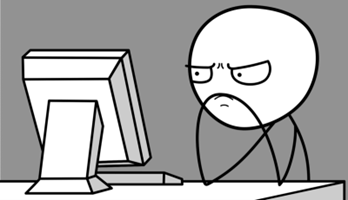

Para ejercitarte y afianzar lo aprendido sobre **Clustering Jerárquico**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Descripción del "Problema"

Existen disponibles datos de encuestas y cuestionarios a 26 instituciones. Estas instituciones han sido evaluadas bajo distintos criterios de desempeño, como profesorado, costos, ubicación, becas e infraestructura. Cada criterio va del 1 al 5, siendo 5 el mayor.

El objetivo principal será segmentar las instituciones en grupos basásndonos en los criterios antes mencionados, y luego generar descripciones y recomendaciones a seguir con respecto a cada uno de los grupos identificados. Las recomendaciones pueden ser para distintos clientes.
    </div>

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

### Ejercicio 1

Carga los datos ("Engg_College_Data") y haz una primera inspección "rápida".

In [3]:
df_college = pd.read_csv('data/Engg_College_Data.csv')
df_college.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [5]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [4]:
df_college.describe(include='all')

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26,26.000000,26.000000,26.000000,26.000000,26.000000
unique,NaN,26,NaN,NaN,NaN,NaN,NaN
top,NaN,A,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN
mean,13.500000,NaN,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,NaN,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,NaN,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,NaN,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,NaN,3.000000,5.000000,4.000000,4.000000,4.750000


### Ejercicio 2

Crea un train_set con una única variable de tipo índice (que nos servirá para identifcar a las instituciones en cada clúster)

In [6]:
train_set = df_college.drop(["SR_NO"], axis = 1)

### Ejercicio 3

Determina el tipo de cada variable, haciendo un univariante de las mismas.

In [7]:
features = train_set.columns.to_list()
features.remove("Engg_College")

(5, 2)


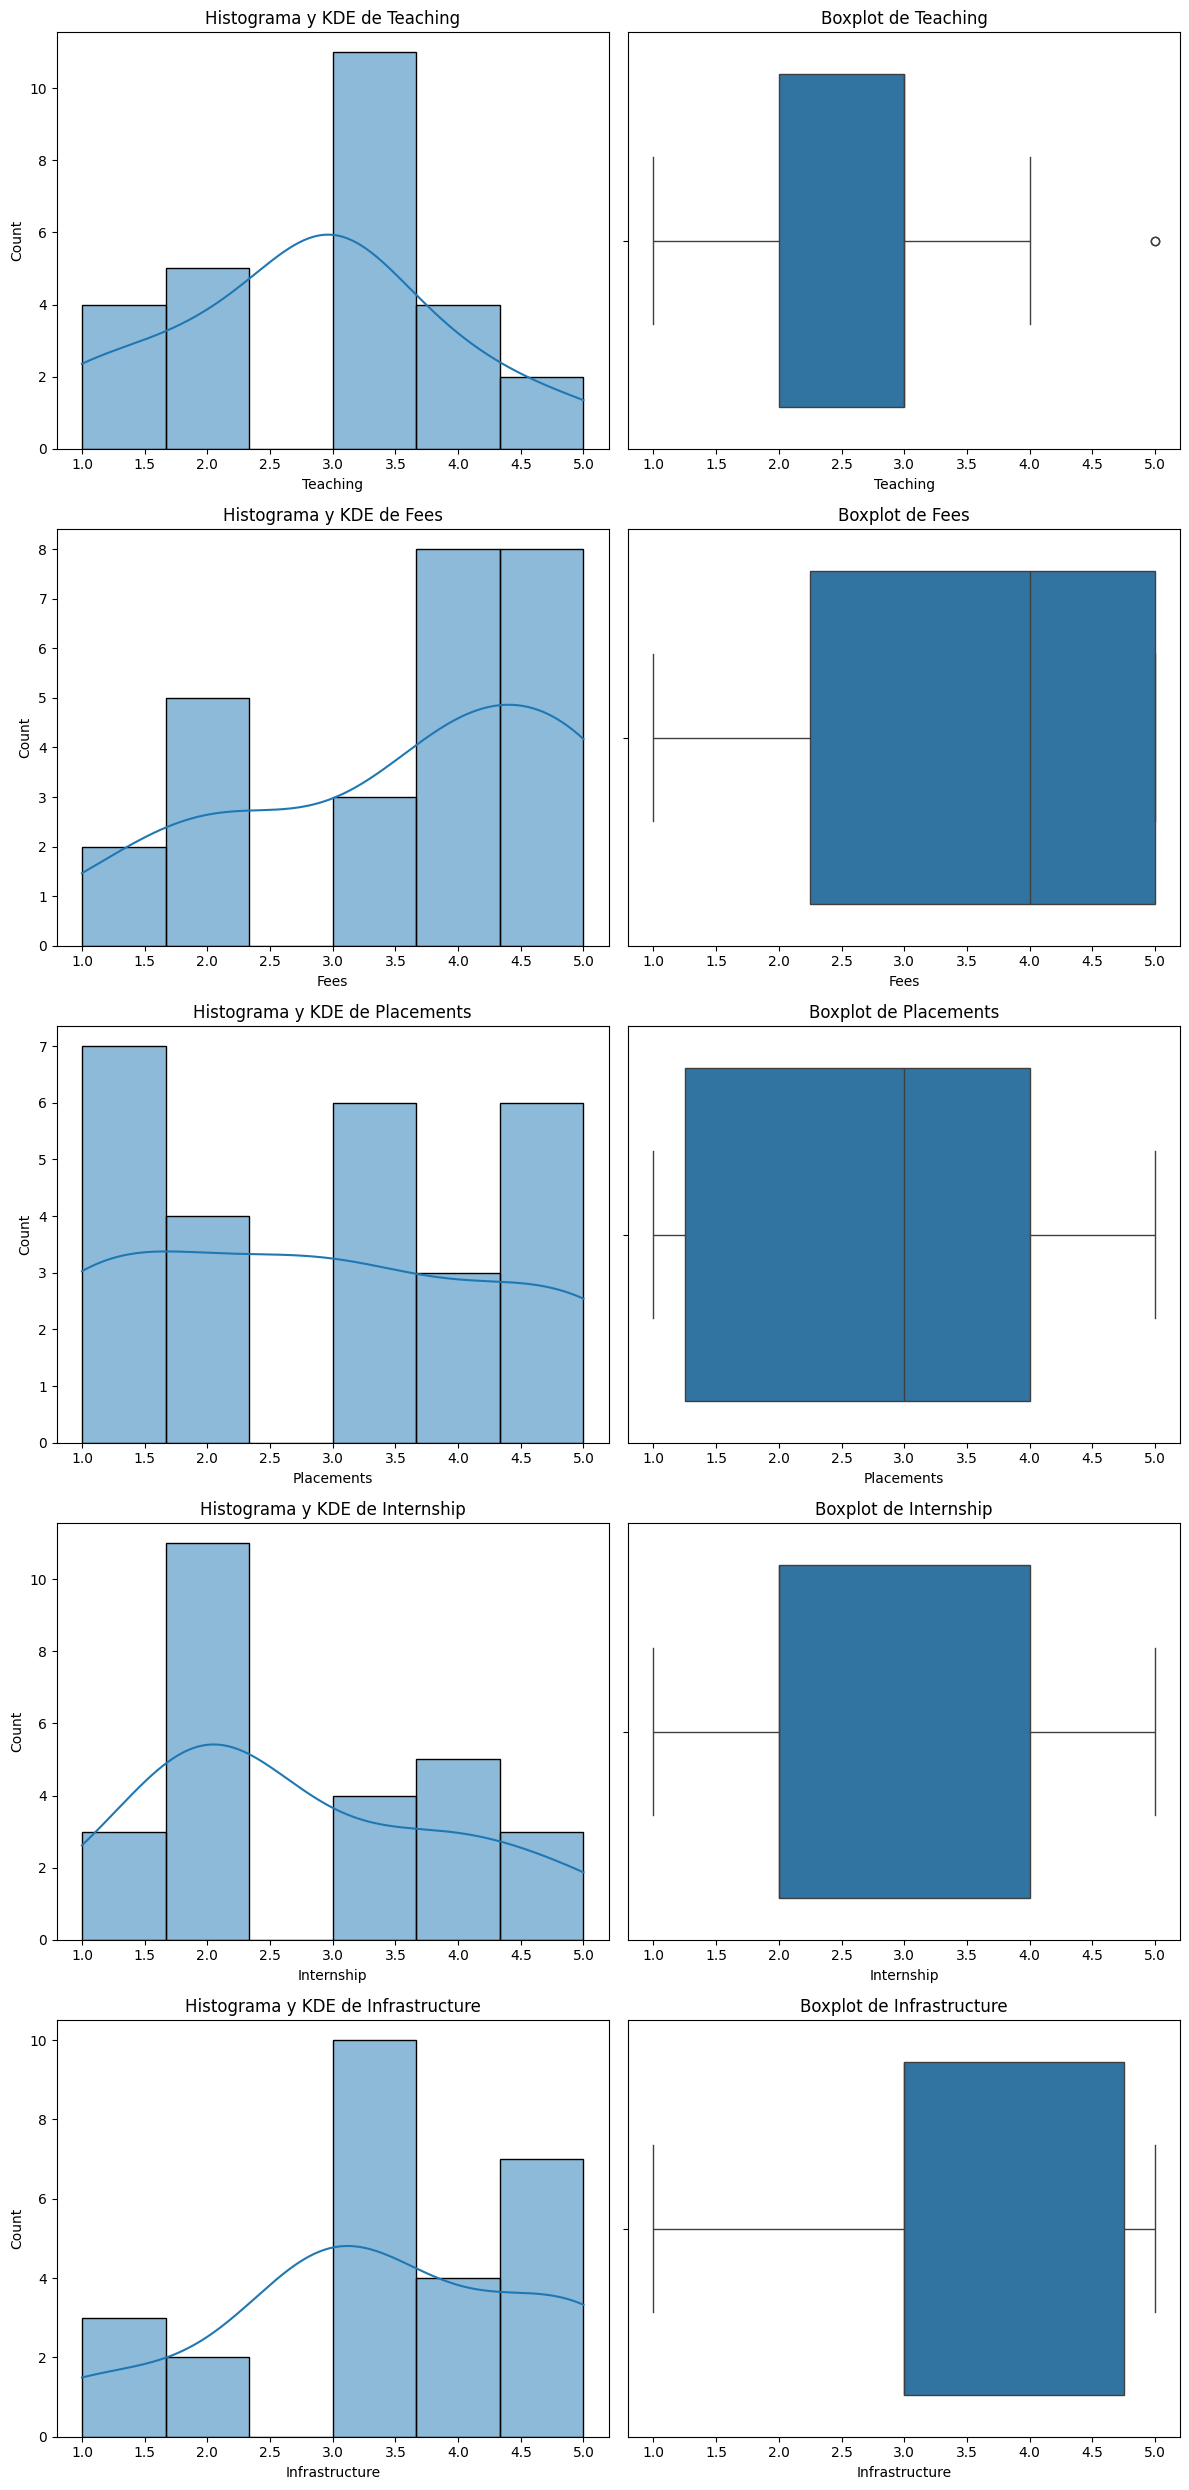

In [8]:
bt.plot_combined_graphs(train_set, features)

In [9]:
for col in features:
    print(f"{col}:")
    print(train_set[col].value_counts())
    print("****")

Teaching:
Teaching
3    11
2     5
4     4
1     4
5     2
Name: count, dtype: int64
****
Fees:
Fees
5    8
4    8
2    5
3    3
1    2
Name: count, dtype: int64
****
Placements:
Placements
1    7
5    6
3    6
2    4
4    3
Name: count, dtype: int64
****
Internship:
Internship
2    11
4     5
3     4
5     3
1     3
Name: count, dtype: int64
****
Infrastructure:
Infrastructure
3    10
5     7
4     4
1     3
2     2
Name: count, dtype: int64
****


*Son variables numéricas discretas considerables como variables categóricas ordinales*

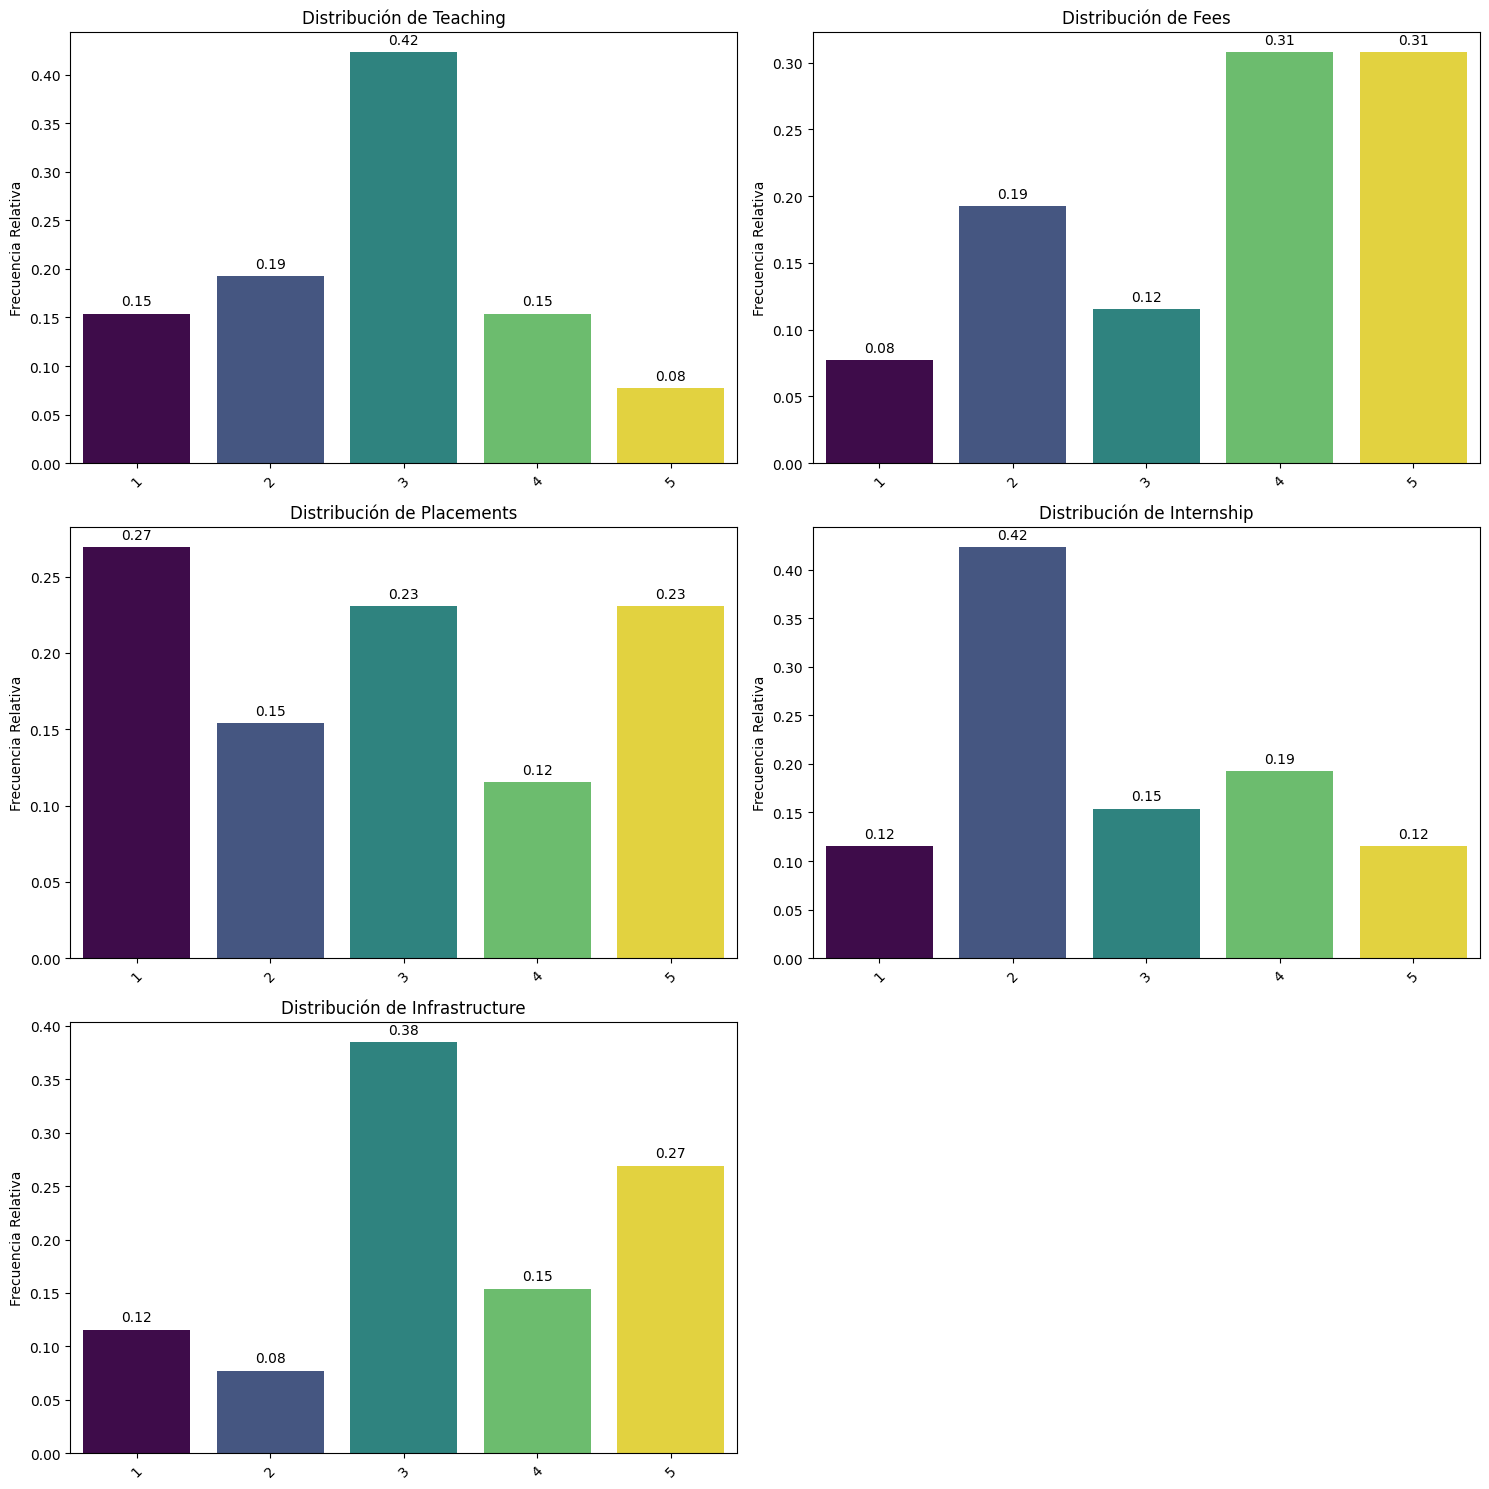

In [10]:
bt.pinta_distribucion_categoricas(train_set, features, mostrar_valores= True, relativa= True)

### Ejercicio 4

Es hora de hacer el miniEDA. Fíjate que en este caso no tenemos contínuas numéricas que nos permitan ver claramente una clusterización con scatter plots. Compruébalo haciendo un pairplot del dataset.

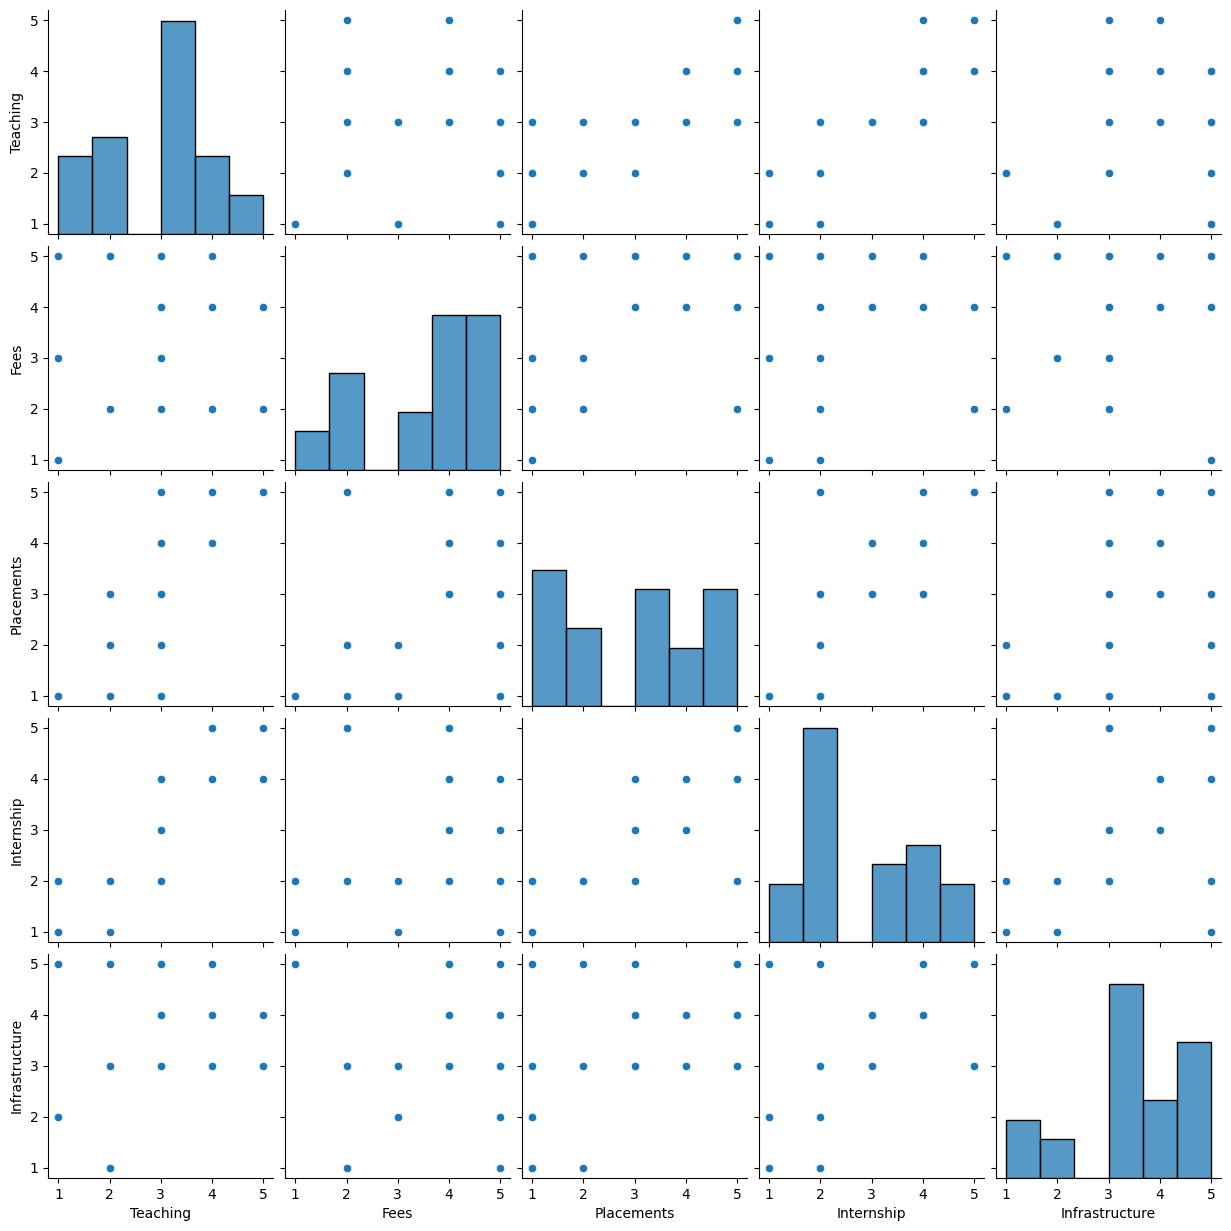

In [11]:
sns.pairplot(train_set[features])

### Ejercicio 5

Podríamos intentar cualquier tipo de clusterización, pero vamos a emplear una clusterización jerárquica porque sea cual sea la agrupación si que nos interesa establecer una jerarquía o una relación de distancia entre las diferentes instituciones (es algo que nos dicen desde el cliente, o sea "Negocio")

Elegido el tipo de clustering, tenemos que determinar los hiperparámetros. En este caso, el número de clusteres. Para ello nos vamos a apoyar en el dendrograma. Construye el dendrograma utilizando "average" como el método de ligado o linkage.



NOTA: no lo hemos hecho, ni dicho, pero nos quedaremos con todas las variables para sean features y como están en la misma escala no hay que procesarlas otra vez.

In [12]:
link_method = linkage(train_set[features], method = 'average')

In [13]:
labelList = np.array(train_set["Engg_College"])
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

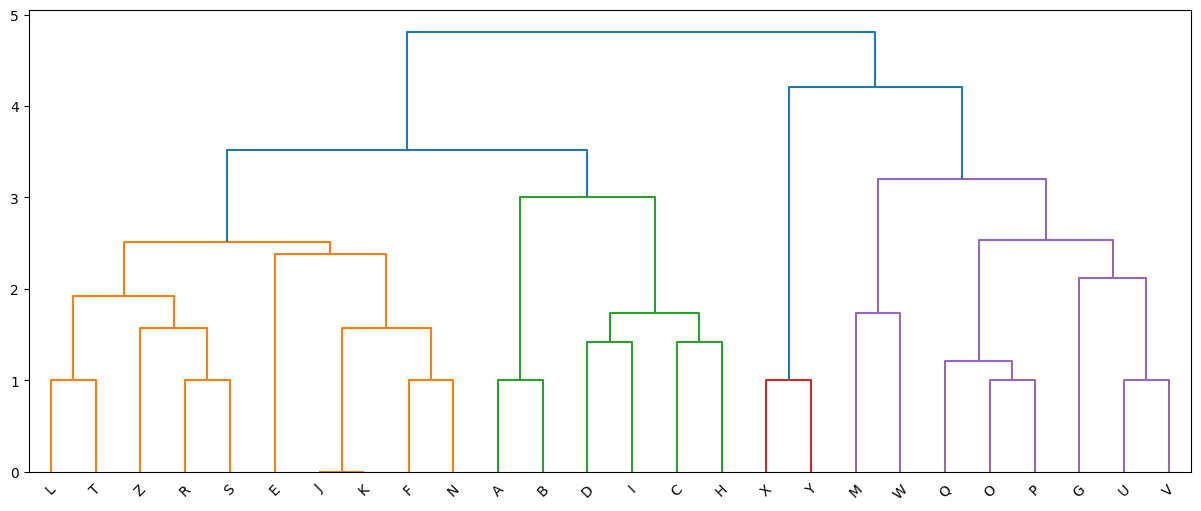

In [14]:
plt.figure(figsize =(15,6))
dend = dendrogram(link_method, labels= labelList)

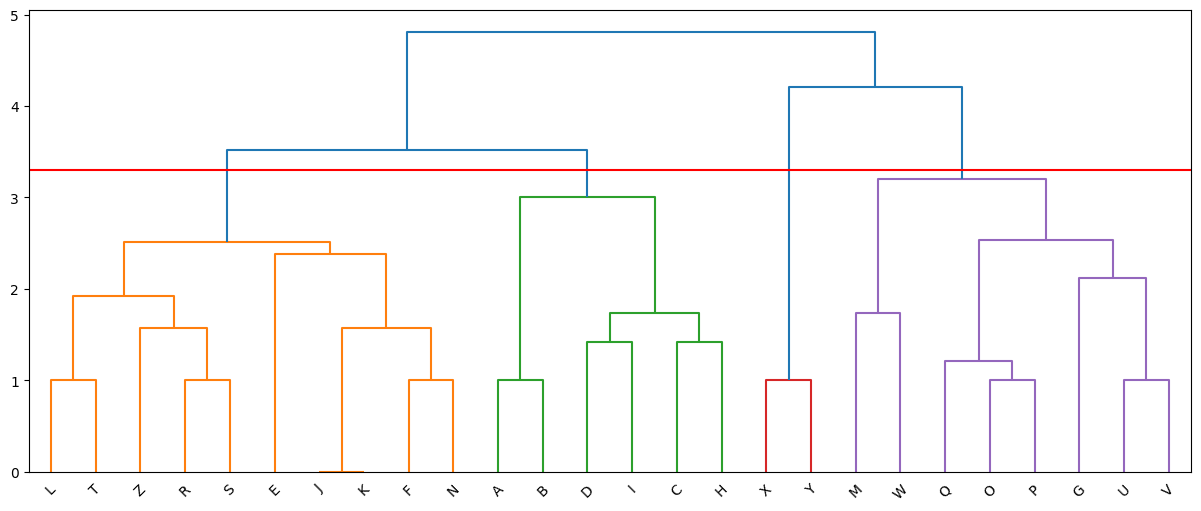

In [15]:
plt.figure(figsize =(15,6))
dend = dendrogram(link_method, labels= labelList)
plt.axhline(y = 3.3, color = 'r', linestyle = '-')

### Ejercicio 6

Utilizando el método del máximo salto horizontal o método del máximo gap, ¿dónde colocarías la recta de corte? Vuelve a dibujar el dendrograma superponiendo esa línea. Decide el número de clusteres.

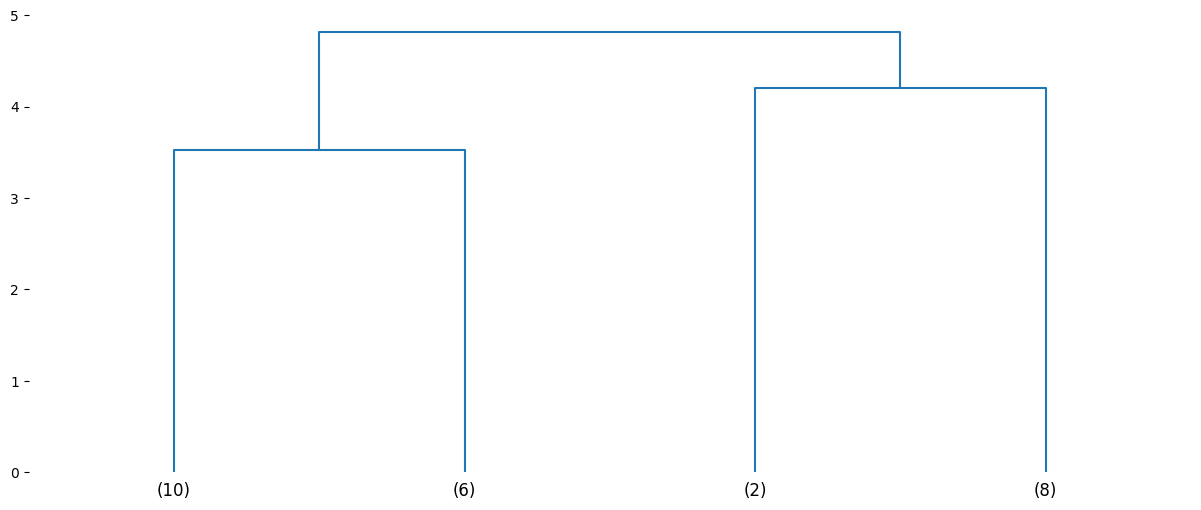

In [16]:
#Miramos cuantos elementos hay en cada cluster
plt.figure(figsize =(15,6))
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 4, # SUSTITUYE AQUI
                 labels = labelList 
                 )
sns.despine(left=True, bottom=True)

*El número de elementos del tercer clúster (2) es bastante menor que en el resto* 

### Ejercicio 7

Utilizando el codigo siguiente, emplea el número de clústeres obtenidos en el ejercicio anterior (usa 4 si no has logrado obtener un número que te convenza) y muestra cuántas instituciones hay por cluster. ¿Qué te llama la atención?

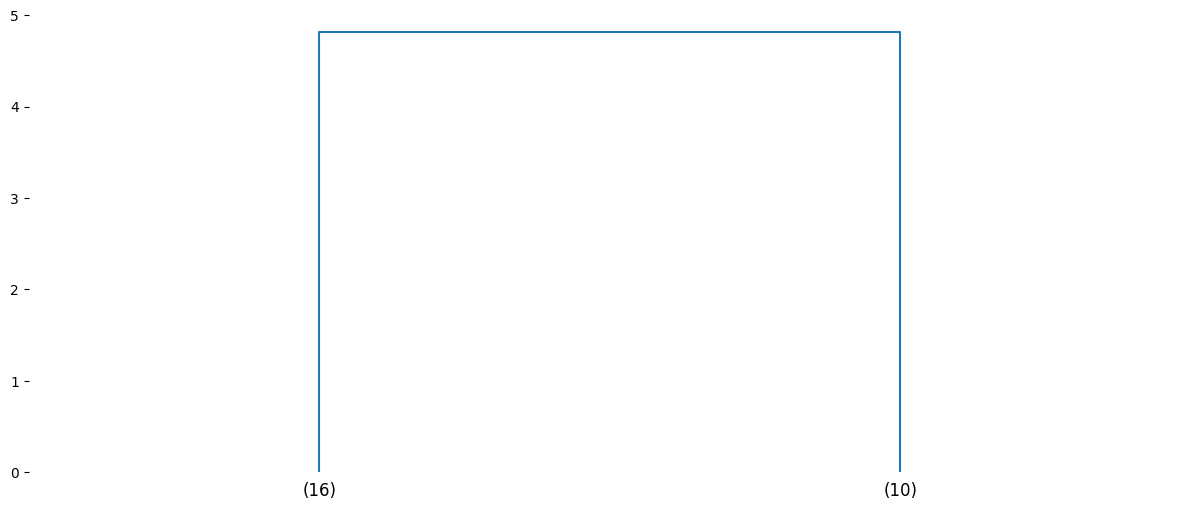

In [17]:
#Miramos cuantos elementos hay en cada cluster
plt.figure(figsize =(15,6))
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 2, # SUSTITUYE AQUI
                 labels = labelList 
                 )
sns.despine(left=True, bottom=True)

### Ejercicio 8

Previo a analizar las características específicas de cada clúster, analiza el clúster con menor número de elementos, es decir muestra las características de sus elementos constituyentes

In [18]:
train_set[train_set["Engg_College"].isin(["X","Y"])]

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
23,X,1,1,1,2,5
24,Y,1,1,1,1,5


### Ejercicio 9

Nos hemos adelantado en el ejercicio anterior. Es hora de construir el clustering tal como hemos visto en el workout, utiliza el "AgglomerativeClustering" de sklearn para hacer el agrupamiento con el número de clusteres elegido y asigna las etiquetas a cada instancia. (Recuerda que hemos usado el linkage a "average", no a "ward" como se suele emplear)

In [19]:
clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
clustering_model.fit(train_set[features])
train_set['Cluster'] = clustering_model.labels_

In [20]:
#Frecuencia de elementos en cada cluster

train_set['Cluster'].value_counts()

Cluster
3    10
0     8
1     6
2     2
Name: count, dtype: int64

### Ejercicio 10

Comprueba que las instancias asignadas al clúster con 2 instancias son las entidades "X" e "Y"

In [21]:
train_set.Cluster.value_counts()

Cluster
3    10
0     8
1     6
2     2
Name: count, dtype: int64

In [22]:
train_set[train_set.Cluster == 2]

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,Cluster
23,X,1,1,1,2,5,2
24,Y,1,1,1,1,5,2


### Ejercicio 11

Igual que podemos intuir que el cluster "pequeño" es el de las instituiciones peor puntuadas, muestra los valores medios de las features para cada clúster y da tu interpretación de que es cada uno. Emplea un gráfico comparativo.


In [23]:
features_mean_by_cluster = train_set[features + ["Cluster"]].groupby('Cluster').mean()
features_mean_by_cluster['Freq'] = train_set['Cluster'].value_counts().sort_index()

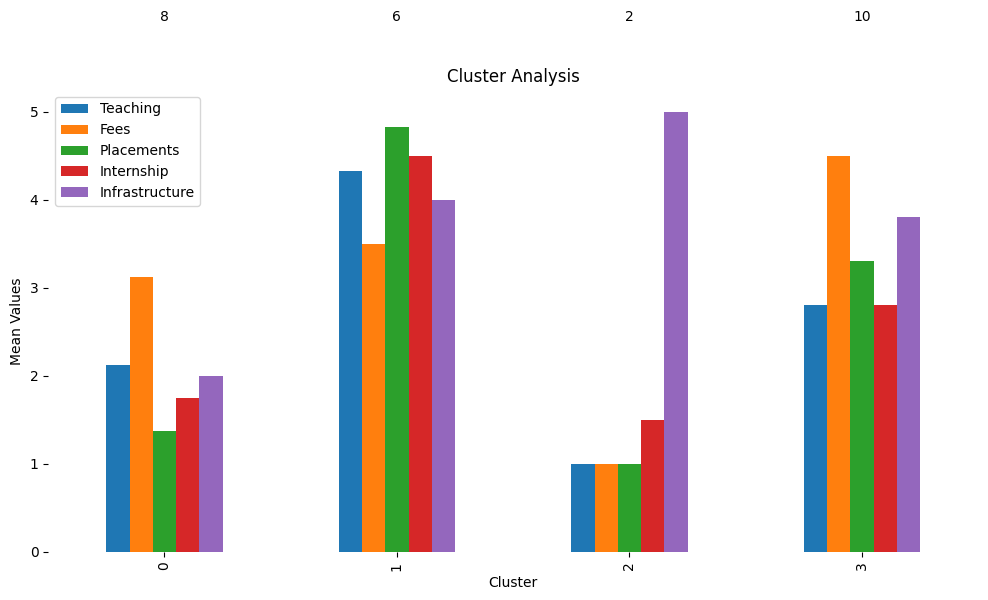

In [24]:
# Perfil de cada cluster
fig, ax = plt.subplots(figsize=(12, 6))
features_mean_by_cluster.iloc[:, :-1].plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Values')
ax.set_title('Cluster Analysis')
for i, v in enumerate(features_mean_by_cluster['Freq']):
    ax.text(i, max(features_mean_by_cluster.iloc[:, :-1].max().max(), 5) + 1, str(v), ha='center', va='bottom')
sns.despine(left=True, bottom=True)
plt.show()

### Ejercicio 12

Para finalizar, ¿qué recomendaciones darías a diferentes clientes en base a los patrones encontrados?